# Distributions of shot heuristics

I added several heuristics for the bias current and kink gyration to the shot database. 
Now I want to query the database and see how these are distributed.

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

import sqlite3
import numpy as np
from scipy.optimize import curve_fit

# Gyration Heuristics

## Gyration Frequency

The gryation frequency is approximatly Gaussian distributed. There are long tails, where The IDL scipt may be picking up noise in non-gyrating shots as peaks.

In [33]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT period FROM Shots WHERE period IS NOT NULL and ")
periods = cursor.fetchall()
cursor.close()
connection.close()

periods = np.asarray(periods)
gyration_frequency = 1. / periods

axes = sns.distplot(gyration_frequency/1e3, axlabel=r'frequency [kHz]', color='purple', kde=False)
axes.set_ylabel('shots')
plt.show()

OperationalError: near " ": syntax error

Here's a fit to the distrbution.

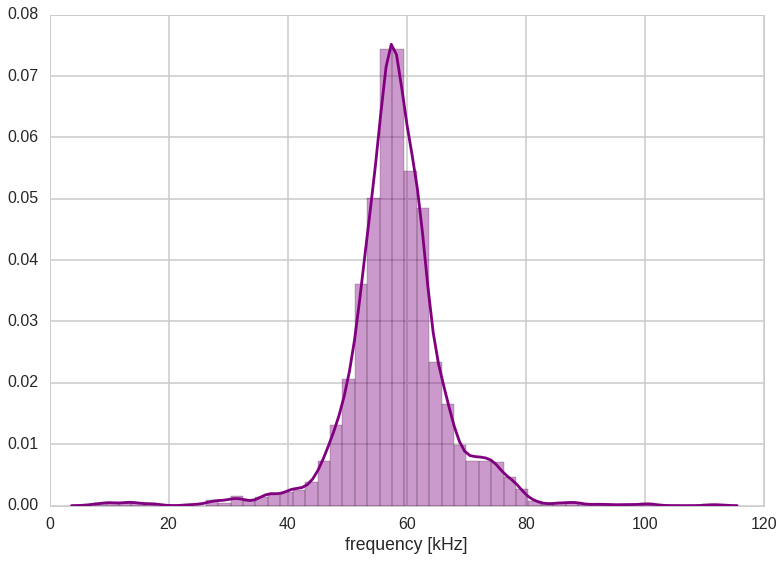

In [34]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT period FROM Shots WHERE period IS NOT NULL")
periods = cursor.fetchall()
cursor.close()
connection.close()

periods = np.asarray(periods)
gyration_frequency = 1. / periods

sns.distplot(gyration_frequency/1e3, axlabel=r'frequency [kHz]', color='purple')
axes.set_ylabel('proability density')
plt.show()

## Spectral density around gyration frequency, from a time window including post crowbar

## There seems to be Gaussian distribution with a long low density tail. The tail could be the shots that did not kink & gyrate.

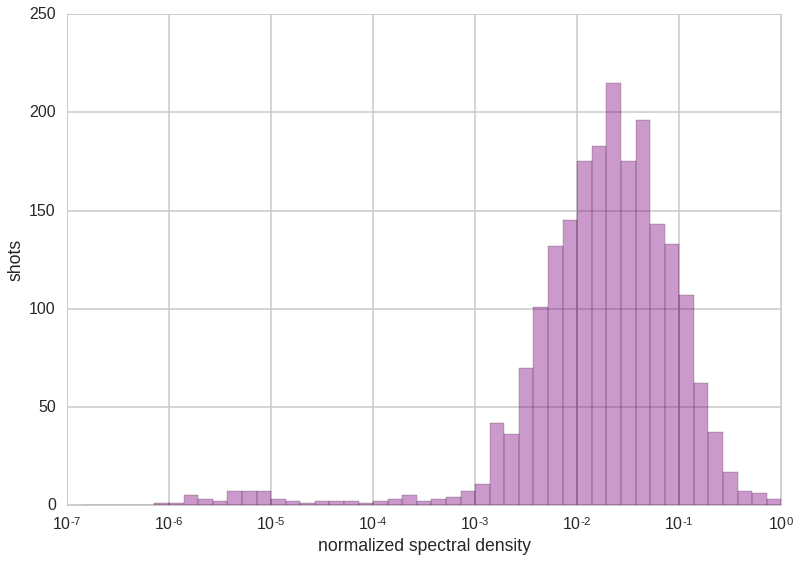

In [35]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT fiducial_gyration_spectral_density FROM Shots WHERE fiducial_gyration_spectral_density IS NOT NULL")
spectral_density = cursor.fetchall()
cursor.close()
connection.close()

bins = np.logspace(-7, 0, 50)

spectral_density = np.asarray(spectral_density)
spectral_density = spectral_density / spectral_density.max() 

axes = sns.distplot(spectral_density, axlabel=r'normalized spectral density', color='purple', bins=bins, kde=False)
axes.set_xscale('log')
axes.set_ylabel('shots')
plt.show()

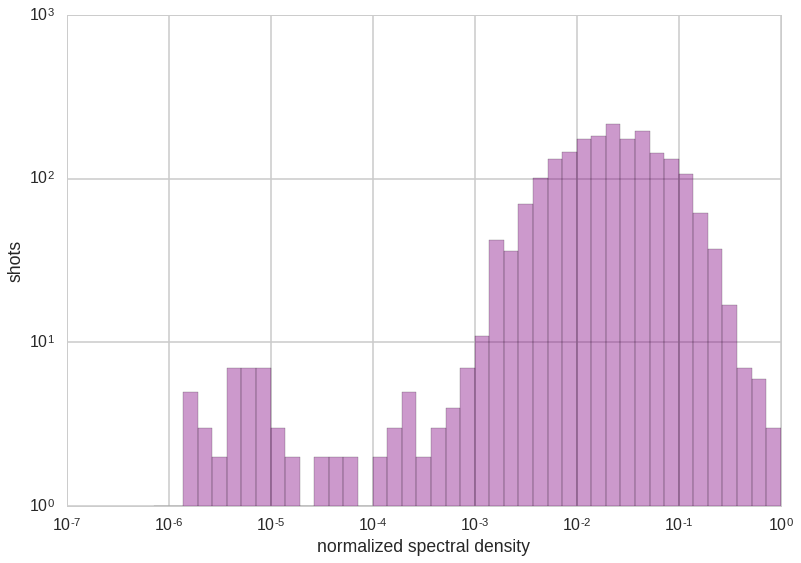

In [36]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT fiducial_gyration_spectral_density FROM Shots WHERE fiducial_gyration_spectral_density IS NOT NULL")
spectral_density = cursor.fetchall()
cursor.close()
connection.close()

bins = np.logspace(-7, 0, 50)

spectral_density = np.asarray(spectral_density)
spectral_density = spectral_density / spectral_density.max() 

axes = sns.distplot(spectral_density, axlabel=r'normalized spectral density', color='purple', bins=bins, kde=False)
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_ylabel('shots')
plt.show()

## Spectral density around gyration frequency over a time widnow only including the pre-crowbar time

## Again there seems to be Gaussian distribution with a long low density tail. The tail could be the shots that did not kink and gyrate before the crowbar time.

1.60292091451e-05


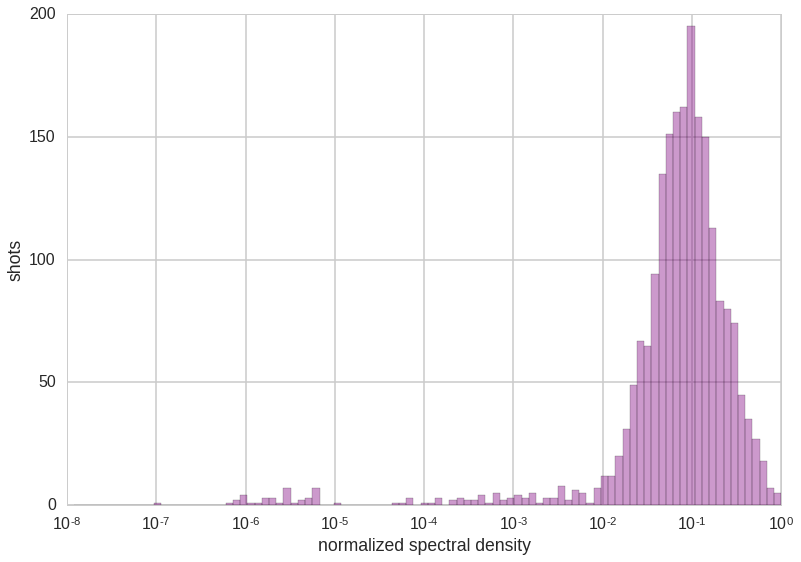

In [37]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT fiducial_pre_crowbar_gyration_spectral_density FROM Shots WHERE fiducial_pre_crowbar_gyration_spectral_density IS NOT NULL")
spectral_density = cursor.fetchall()
cursor.close()
connection.close()

bins = np.logspace(-8, 0., 100)

spectral_density = np.asarray(spectral_density)
print spectral_density.max()
spectral_density = spectral_density / spectral_density.max() 

axes = sns.distplot(spectral_density, axlabel=r'normalized spectral density', color='purple', bins=bins, kde=False)
axes.set_xscale('log')
axes.set_ylabel('shots')
plt.show()

In [38]:
def fit_func_gauss_poly(x, a0, a1, a2, a3, a4, a5):
    z = (x - a1) / (np.sqrt(2)*a2)
    y = a0 * np.exp(-z**2) + a3 + a4 * x + a5 * x**2
    return y

In [39]:
def fit_func_pure_gauss(x, a0, a1, a2, a3):
    z = (x - a1) / (np.sqrt(2)*a2)
    y = a0 * np.exp(-z**2) + a3
    return y

In [40]:
bins=np.logspace(-8, 1, 10*8)

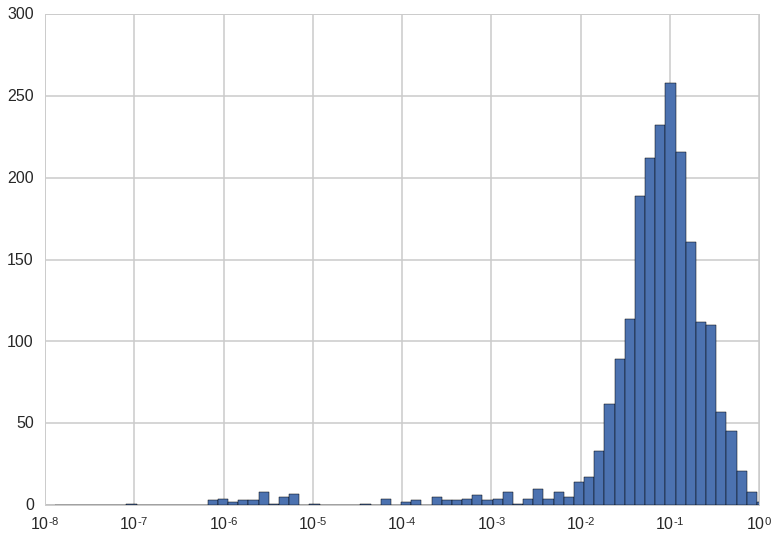

In [41]:
n, bins, patches = plt.hist(spectral_density, bins=np.logspace(-8, 1, 10*8))
axes = plt.gca()
axes.set_xscale('log')
plt.xlim((1e-8, 1))
plt.show()

In [42]:
parameters, covariance = curve_fit(fit_func_pure_gauss, np.log(bins[:-1] + np.diff(bins)/2), n, p0=[250, -1, 1, 1e-3])

In [43]:
parameters

array([ 237.81557844,   -2.41019959,    0.83754701,    2.08475072])

In [44]:
fit_func_pure_gauss(np.log(bins), *parameters)

array([   2.08475072,    2.08475072,    2.08475072,    2.08475072,
          2.08475072,    2.08475072,    2.08475072,    2.08475072,
          2.08475072,    2.08475072,    2.08475072,    2.08475072,
          2.08475072,    2.08475072,    2.08475072,    2.08475072,
          2.08475072,    2.08475072,    2.08475072,    2.08475072,
          2.08475072,    2.08475072,    2.08475072,    2.08475072,
          2.08475072,    2.08475072,    2.08475072,    2.08475072,
          2.08475072,    2.08475072,    2.08475072,    2.08475072,
          2.08475072,    2.08475072,    2.08475072,    2.08475072,
          2.08475072,    2.08475072,    2.08475073,    2.08475074,
          2.08475081,    2.0847514 ,    2.08475528,    2.08477881,
          2.08490757,    2.08554481,    2.08839536,    2.09991556,
          2.14195379,    2.28036438,    2.69117586,    3.78907957,
          6.42713024,   12.11473707,   23.08725527,   41.95417956,
         70.69786345,  109.13123577,  153.4882393 ,  196.21693

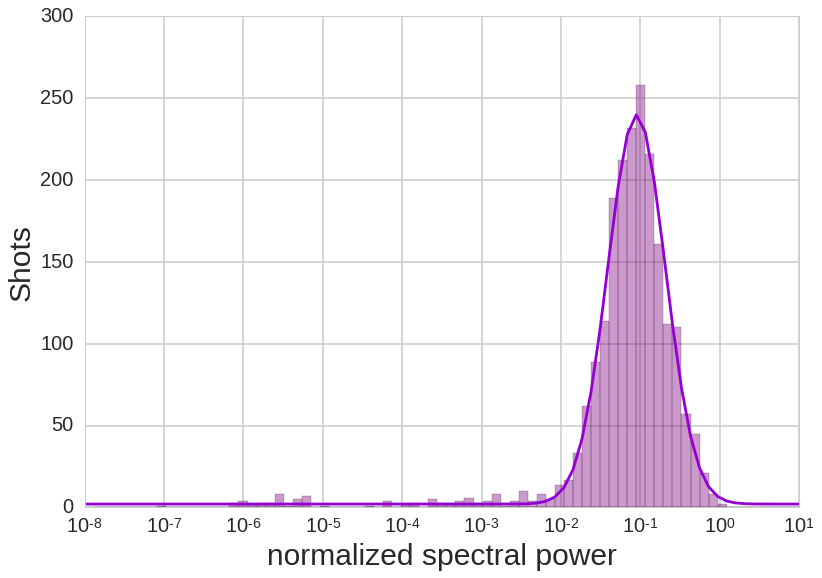

In [45]:
axes = sns.distplot(spectral_density, axlabel=r'normalized spectral power', color='purple', bins=bins, kde=False)
axes.set_xscale('log')
axes.set_xlabel(axes.get_xlabel(), fontsize=30)
axes.set_ylabel('Shots', fontsize=30)
plt.plot(bins, fit_func_pure_gauss(np.log(bins), *parameters), color='darkviolet')
plt.tick_params(axis='both', which='major', labelsize=20)

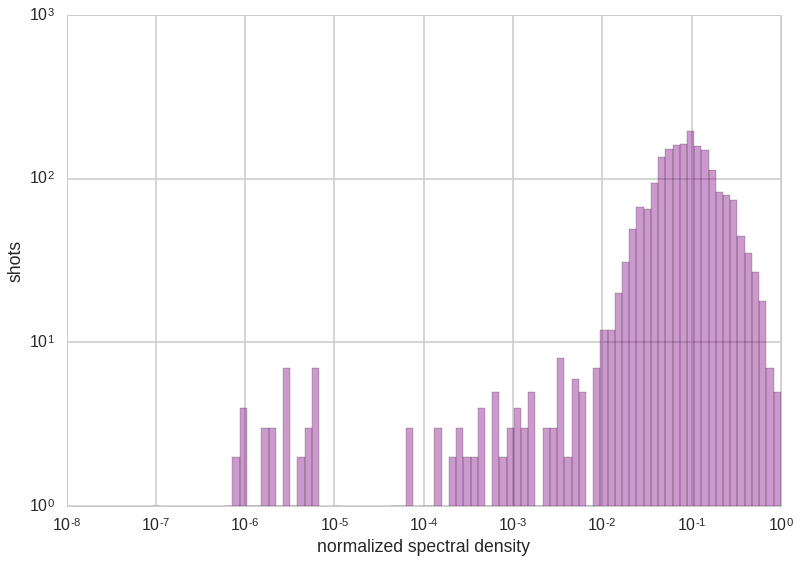

In [46]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT fiducial_pre_crowbar_gyration_spectral_density FROM Shots WHERE fiducial_pre_crowbar_gyration_spectral_density IS NOT NULL")
spectral_density = cursor.fetchall()
cursor.close()
connection.close()

bins = np.logspace(-8, 0., 100)

spectral_density = np.asarray(spectral_density)
spectral_density = spectral_density / spectral_density.max() 

axes = sns.distplot(spectral_density, axlabel=r'normalized spectral density', color='purple', bins=bins, kde=False)
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_ylabel('shots')
plt.show()

# Fit a distribution 

In [47]:
from scipy.stats import lognorm

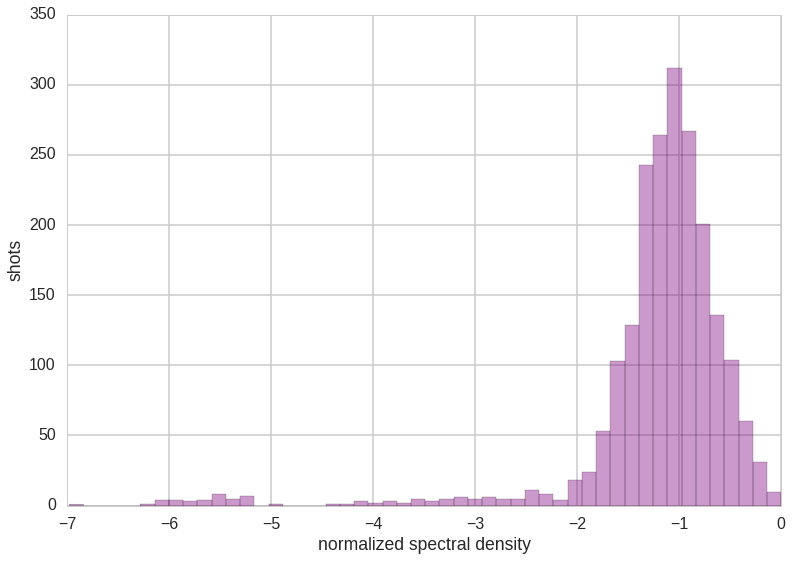

In [48]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT fiducial_pre_crowbar_gyration_spectral_density FROM Shots WHERE fiducial_pre_crowbar_gyration_spectral_density IS NOT NULL")
spectral_density = cursor.fetchall()
cursor.close()
connection.close()

bins = np.logspace(-8, 0., 100)

spectral_density = np.asarray(spectral_density)
spectral_density = spectral_density / spectral_density.max() 
spectral_density_log = np.log10(spectral_density)

#axes = sns.distplot(spectral_density, fit=lognorm, axlabel=r'normalized spectral density', color='purple', bins=bins, kde=False)
axes = sns.distplot(spectral_density_log, axlabel=r'normalized spectral density', color='purple', kde=False)
#axes = sns.distplot(spectral_density, fit=lognorm, axlabel=r'normalized spectral density', color='purple', bins=bins, kde=False)

#axes.set_xscale('log')
#axes.set_yscale('log')
axes.set_ylabel('shots')
plt.show()

In [49]:
spectral_density_log.std()

0.80266007763454728

In [50]:
spectral_density_log.mean()

-1.2017683061374536

# What is the max spectral density, i.e. the normalization factor

In [51]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT fiducial_pre_crowbar_gyration_spectral_density FROM Shots WHERE fiducial_pre_crowbar_gyration_spectral_density IS NOT NULL")
spectral_density = cursor.fetchall()
cursor.close() 
connection.close()
spectral_density = np.asarray(spectral_density)
print spectral_density.max()*9*10**-3

1.44262882306e-07


In [52]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT fiducial_pre_crowbar_gyration_spectral_density FROM Shots WHERE fiducial_pre_crowbar_gyration_spectral_density IS NOT NULL")
spectral_density = cursor.fetchall()
cursor.close()
connection.close()
spectral_density = np.asarray(spectral_density)
print spectral_density.max()*1*10**-3

1.60292091451e-08


# What is the spread in amplitudes in the 'good' spectral power shots

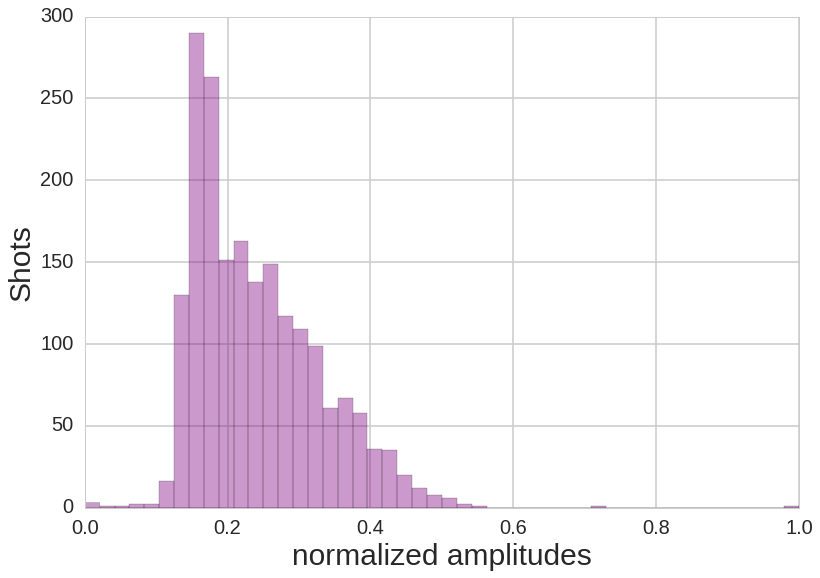

In [84]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT uncalibrated_integrated_fiducial_a_gyration_amplitude FROM Shots WHERE" +
" (fiducial_pre_crowbar_gyration_spectral_density > 1.6e-7 and period IS NOT NULL)")
amplitudes = cursor.fetchall()
cursor.close()
connection.close()

amplitudes = np.asarray(amplitudes)
amplitudes = amplitudes / amplitudes.max()

axes = sns.distplot(amplitudes, axlabel=r'normalized amplitudes', color='purple', kde=False)
plt.tick_params(axis='both', which='major', labelsize=20)
axes.set_xlabel(axes.get_xlabel(), fontsize=30)
axes.set_ylabel('Shots', fontsize=30)

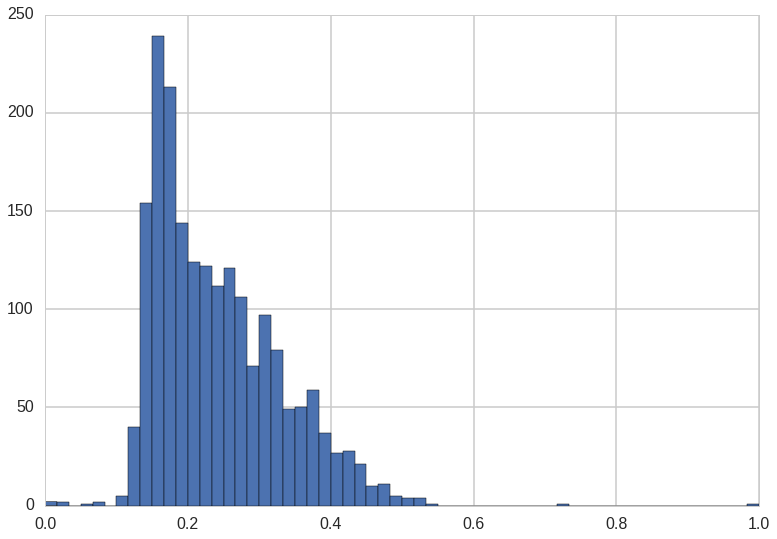

In [85]:
n, bins, patches = plt.hist(amplitudes, bins=60)

In [86]:
from scipy.stats import truncnorm

In [87]:
amplitudes.mean()

0.24172454774217483

In [90]:
amplitudes.std()

0.088754174830633151

In [97]:
parameters, covariance = curve_fit(fit_func_pure_gauss, bins[:-1] + np.diff(bins)/2, n, p0=[230, 0.2, 0.08, 0.1])

In [93]:
parameters

array([  1.58189534e+02,   2.10542815e-01,   7.51917251e-02,
         2.62628668e+00])

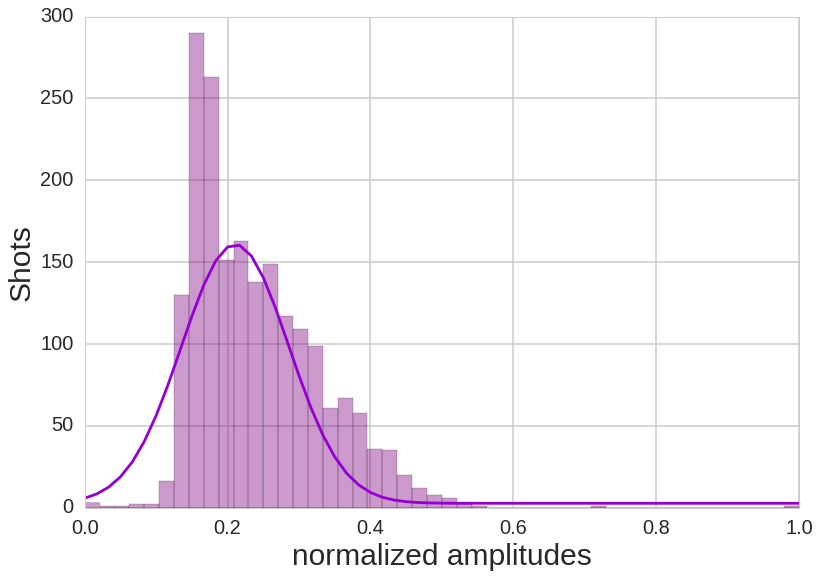

In [99]:
axes = sns.distplot(amplitudes, axlabel=r'normalized amplitudes', color='purple', kde=False)
plt.tick_params(axis='both', which='major', labelsize=20)
axes.set_xlabel(axes.get_xlabel(), fontsize=30)
axes.set_ylabel('Shots', fontsize=30)
plt.plot(bins, fit_func_pure_gauss(bins, *parameters), color='darkviolet')

# Bias Current Heuristics

## Bias Current Peak

### The bias current has two bumps. I think the higher current bump may be due to misidentification of noise as the current peak.

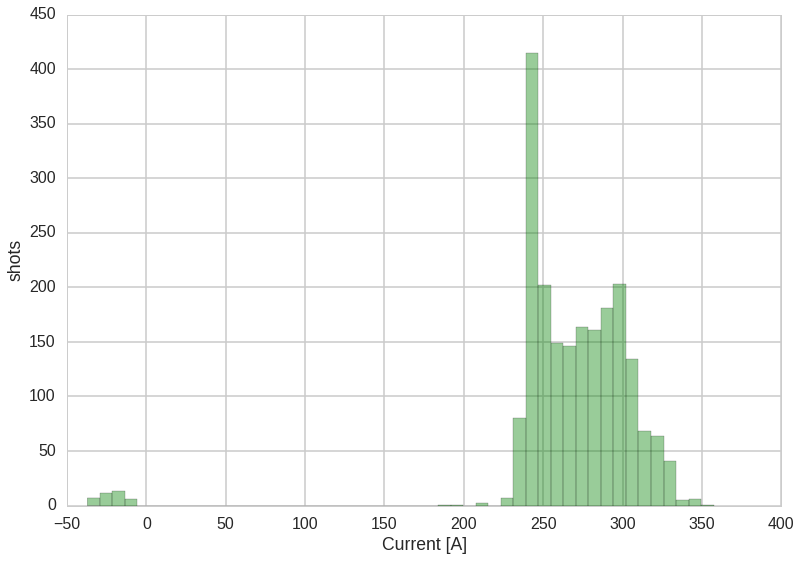

In [23]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT bias_current_peak FROM Shots WHERE bias_current_peak IS NOT NULL")
bias_current_peak = cursor.fetchall()
cursor.close()
connection.close()

bias_current_peak = np.asarray(bias_current_peak)

axes = sns.distplot(bias_current_peak*2e3, axlabel=r'Current [A]', color='green', kde=False)
axes.set_ylabel('shots')
plt.show()

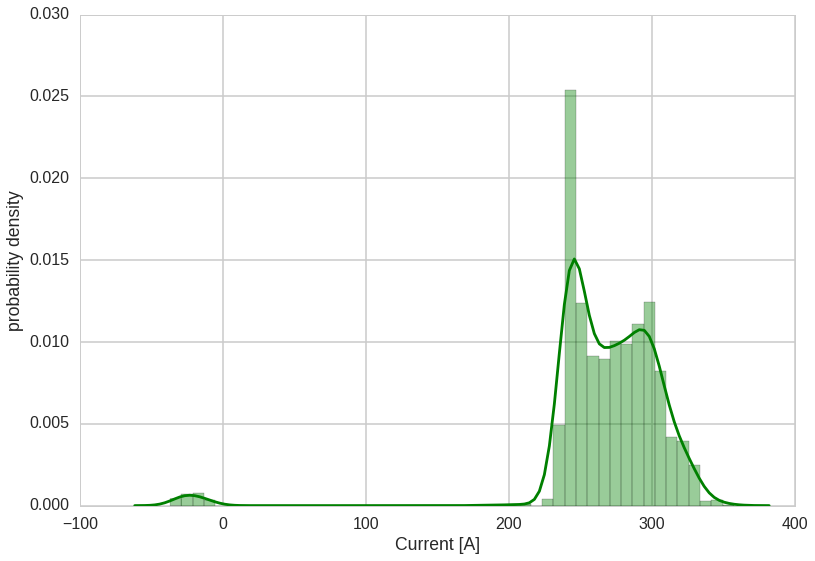

In [24]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT bias_current_peak FROM Shots WHERE bias_current_peak IS NOT NULL")
bias_current_peak = cursor.fetchall()
cursor.close()
connection.close()

bias_current_peak = np.asarray(bias_current_peak)

axes = sns.distplot(bias_current_peak*2e3, axlabel=r'Current [A]', color='green')
axes.set_ylabel('probability density')
plt.show()

### If I only query the shots that had a large noise on the bias current trace pre-ramp up. I get high peak current shots. If we removed these from the above distributions we might get a more gaussian profile.

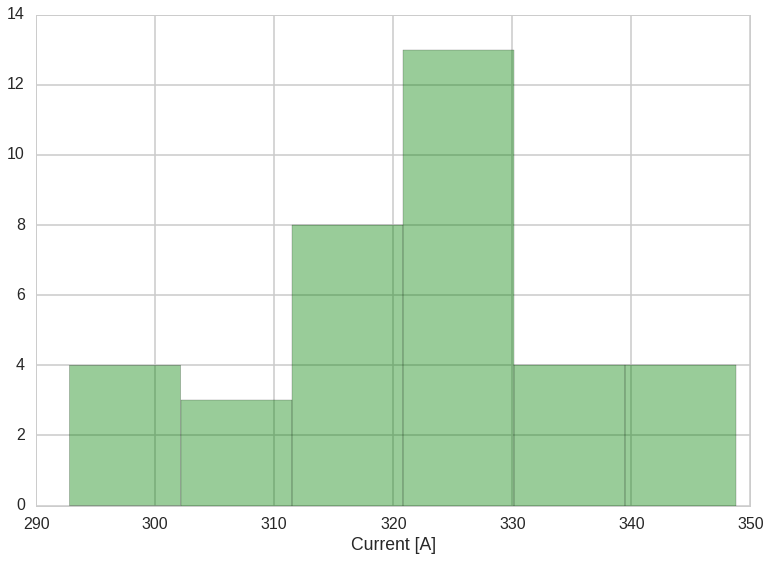

In [25]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT bias_current_peak FROM Shots WHERE bias_current_peak IS NOT NULL AND bias_current_pre_ramp_std > 0.002")
bias_current_peak = cursor.fetchall()
cursor.close()
connection.close()

bias_current_peak = np.asarray(bias_current_peak)

sns.distplot(bias_current_peak*2e3, axlabel=r'Current [A]', color='green', kde=False)
plt.show()

## Bias Current Crowbar Time

## The crowbar time is very reproducible, almost a delta function. There is a far out bump which corresponds to the shots where the current was mostly flat my procdure is identifying noise as the crowbar.

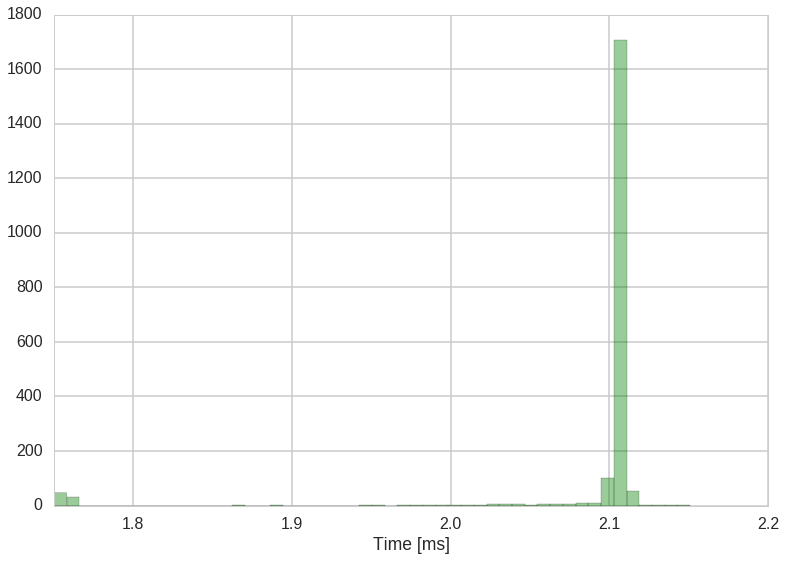

In [26]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT bias_current_crowbar_time FROM Shots WHERE bias_current_crowbar_time IS NOT NULL")
bias_current_crowbar_time = cursor.fetchall()
cursor.close()
connection.close()

bias_current_crowbar_time = np.asarray(bias_current_crowbar_time)

sns.distplot(bias_current_crowbar_time*1e3, axlabel=r'Time [ms]', color='green', kde=False)
plt.show()

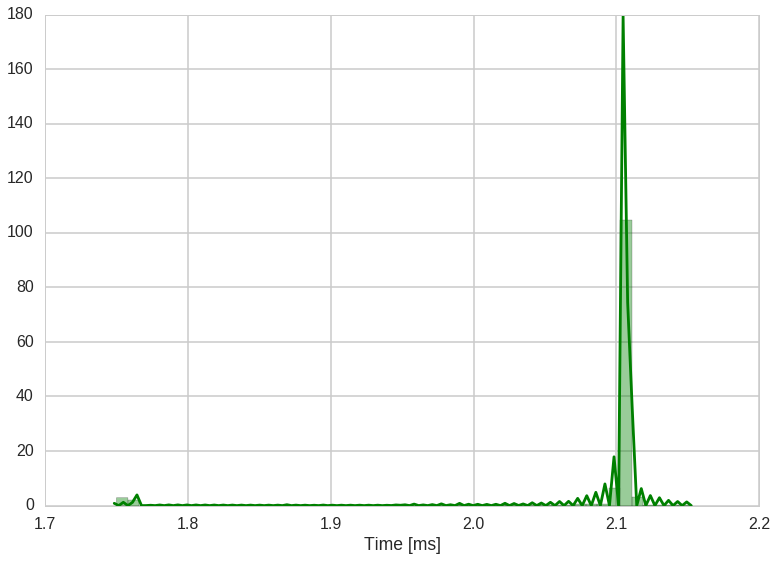

In [27]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT bias_current_crowbar_time FROM Shots WHERE bias_current_crowbar_time IS NOT NULL")
bias_current_crowbar_time = cursor.fetchall()
cursor.close()
connection.close()

bias_current_crowbar_time = np.asarray(bias_current_crowbar_time)

sns.distplot(bias_current_crowbar_time*1e3, axlabel=r'Time [ms]', color='green')
plt.show()

## Onset of Current Ramp Time

### The current ramp time has a little bit more variation. The plasma has to form to allow the current to flow.

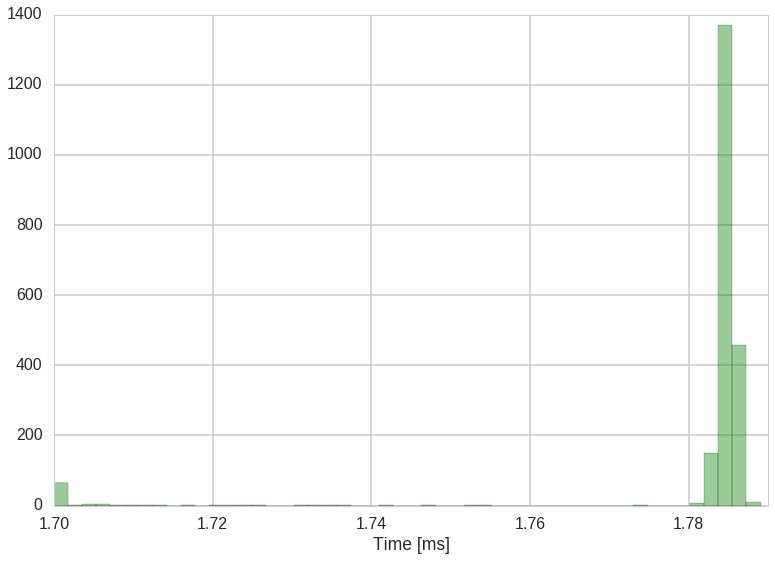

In [28]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT ramp_time FROM Shots WHERE ramp_time IS NOT NULL")
ramp_time = cursor.fetchall()
cursor.close()
connection.close()

ramp_time = np.asarray(ramp_time)

sns.distplot(ramp_time*1e3, axlabel=r'Time [ms]', color='green', kde=False)
plt.show()

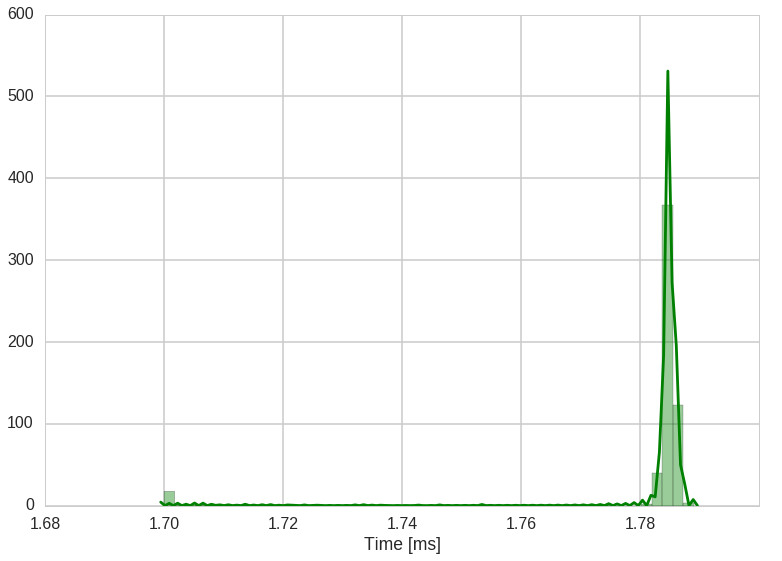

In [29]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT ramp_time FROM Shots WHERE ramp_time IS NOT NULL")
ramp_time = cursor.fetchall()
cursor.close()
connection.close()

ramp_time = np.asarray(ramp_time)

sns.distplot(ramp_time*1e3, axlabel=r'Time [ms]', color='green')
plt.show()

## Noise on bias current signal pre-ramp

### Most shots have a noise precrowbar noise below 1mV but there are a fair number that have an order of magnitude higher noise. This can be seen when changing the x-axis scale to logarithmic.

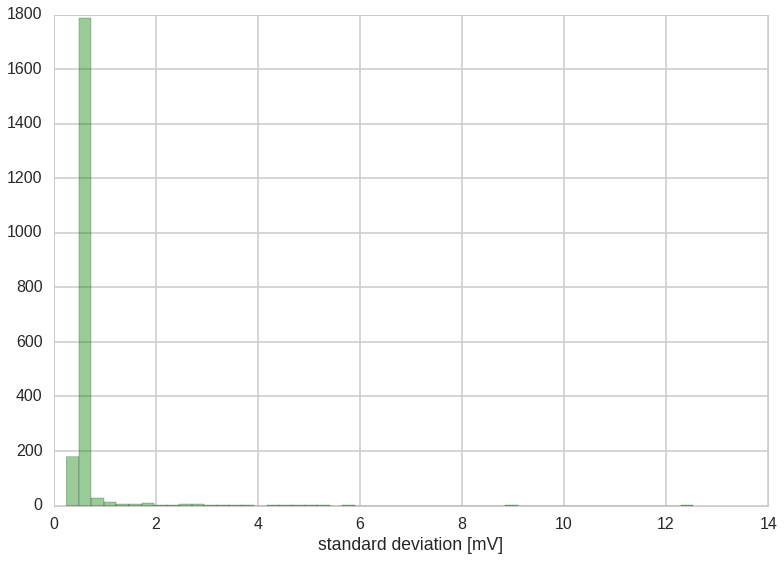

In [30]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT bias_current_pre_ramp_std FROM Shots WHERE bias_current_pre_ramp_std IS NOT NULL")
bias_current_pre_ramp_std = cursor.fetchall()
cursor.close()
connection.close()

bias_current_pre_ramp_std = np.asarray(bias_current_pre_ramp_std)

sns.distplot(bias_current_pre_ramp_std*1e3, axlabel=r'standard deviation [mV]', color='green', kde=False)
plt.show()

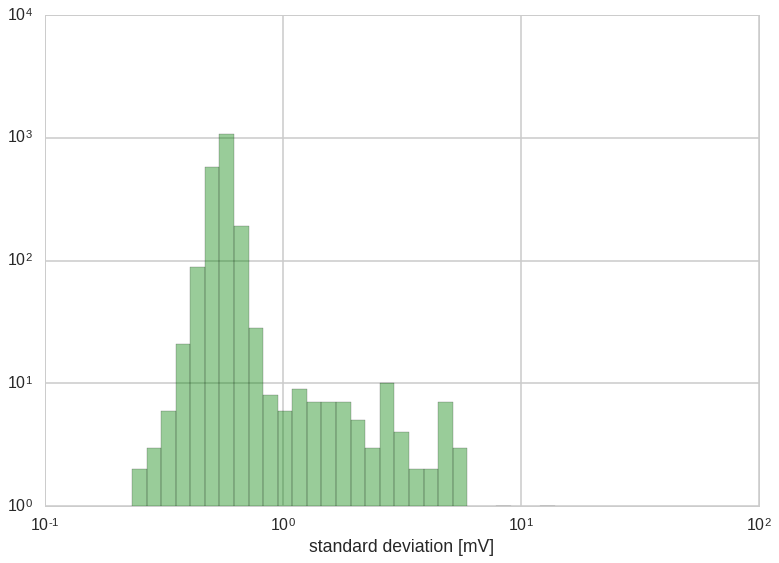

In [31]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("SELECT bias_current_pre_ramp_std FROM Shots WHERE bias_current_pre_ramp_std IS NOT NULL")
bias_current_pre_ramp_std = cursor.fetchall()
cursor.close()
connection.close()

bias_current_pre_ramp_std = np.asarray(bias_current_pre_ramp_std)

bins = np.logspace(-1, 2, 50)
axes.set_yscale('log')
axes = sns.distplot(bias_current_pre_ramp_std*1e3, axlabel=r'standard deviation [mV]', 
                    color='green', kde=False, bins=bins)

axes.set_yscale('log')
axes.set_xscale('log')

plt.show()